<a href="https://colab.research.google.com/github/KodumuruRaja/Feature-Selection/blob/main/Feature-Selection-(InformationGain-MutualInformation%20in%20Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv")

In [ ]:
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
data['Wine'].unique()

array([1, 2, 3])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
x=data.drop(labels=['Wine'],axis=1)
y=data['Wine']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [ ]:
x_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [ ]:
#determine the mutual information
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(x_train,y_train)
mi

array([0.42830891, 0.29872892, 0.16436992, 0.26124886, 0.17644739,
       0.47207633, 0.71462948, 0.11215289, 0.26203665, 0.62355296,
       0.57952887, 0.5452594 , 0.53274617])

In [ ]:
mi=pd.Series(mi)
mi.index=x_train.columns
mi.sort_values(ascending=False)

Flavanoids              0.714629
Color.int               0.623553
Hue                     0.579529
OD                      0.545259
Proline                 0.532746
Phenols                 0.472076
Alcohol                 0.428309
Malic.acid              0.298729
Proanth                 0.262037
Acl                     0.261249
Mg                      0.176447
Ash                     0.164370
Nonflavanoid.phenols    0.112153
dtype: float64

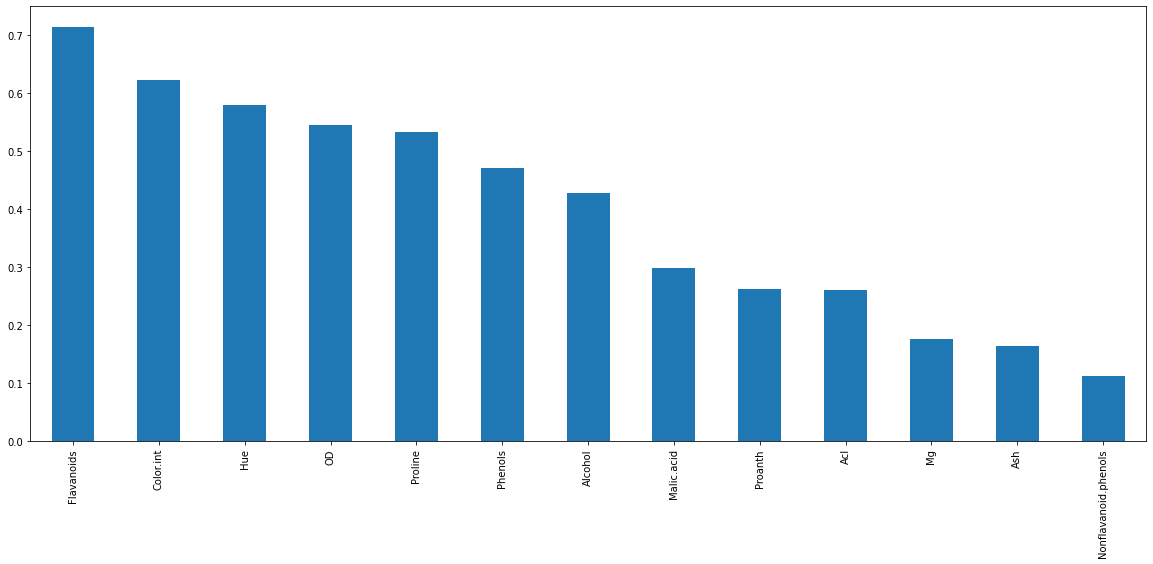

In [ ]:
mi.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
sc=SelectKBest(mutual_info_classif,k=5)
sc.fit(x_train.fillna(0),y_train)
x_train.columns[sc.get_support()]


Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')